In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
link = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSpkPlNrQ8ugVsrzXzoZcLcgv_BIbOcKFEsY-GA7wwZ3dLrtuC9bo1ahjR6dYgAhg/pub?output=xlsx'
df = pd.read_excel(link)
df.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [3]:
df.dtypes

date      datetime64[ns]
spx              float64
dax              float64
ftse             float64
nikkei           float64
dtype: object

In [4]:
# 1 fecha como índice

df.set_index('date',inplace=True)
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [5]:
df.shape

(6269, 4)

In [9]:
# agrupando por mes

series1 = df.resample('M').sum()
series1.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-31,8065.85,36503.51,58435.11,320186.81
1994-02-28,9427.71,42473.93,67927.81,394252.44
1994-03-31,10667.58,48965.44,73740.69,460945.92
1994-04-30,9395.05,46313.44,65660.69,415877.30
1994-05-31,9926.20,48837.57,67876.35,444471.36


In [10]:
series1.shape

(289, 4)

In [11]:
df2 = series1.reset_index()
df2.head()

,date,spx,dax,ftse,nikkei
0,1994-01-31,8065.85,36503.51,58435.11,320186.81
1,1994-02-28,9427.71,42473.93,67927.81,394252.44
2,1994-03-31,10667.58,48965.44,73740.69,460945.92
3,1994-04-30,9395.05,46313.44,65660.69,415877.30
4,1994-05-31,9926.20,48837.57,67876.35,444471.36


# Redimensionando nuestra df, función melt

In [12]:
melt = df2.melt(id_vars=['date'],var_name='Empresa',value_name='monto')
melt.head()

,date,Empresa,monto
0,1994-01-31,spx,8065.85
1,1994-02-28,spx,9427.71
2,1994-03-31,spx,10667.58
3,1994-04-30,spx,9395.05
4,1994-05-31,spx,9926.20


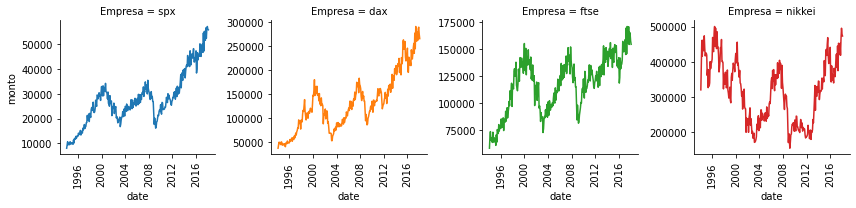

In [16]:
# Plot utilizando seaborn

g = sns.FacetGrid(melt, col="Empresa"
                      ,col_wrap = 4
                  ,sharex=False
                      ,sharey=False
                  ,hue='Empresa'
                  )
g.map(sns.lineplot, "date", "monto")

# gira los elementos del eje _x

for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

In [17]:
# agregando media

melt['media'] = melt.groupby('Empresa')['monto'].transform('mean')
melt['MA_4'] = melt.groupby('Empresa')['monto'].rolling(4).mean().reset_index(level=0,drop=True).shift(-1)
melt.head(10)

,date,Empresa,monto,media,MA_4
0,1994-01-31,spx,8065.85,27942.116129,NaN
1,1994-02-28,spx,9427.71,27942.116129,NaN
2,1994-03-31,spx,10667.58,27942.116129,9389.0475
3,1994-04-30,spx,9395.05,27942.116129,9854.1350
4,1994-05-31,spx,9926.20,27942.116129,9998.7500
5,1994-06-30,spx,10006.17,27942.116129,9700.4075
6,1994-07-31,spx,9474.21,27942.116129,10021.0450
7,1994-08-31,spx,10677.60,27942.116129,10108.7600
8,1994-09-30,spx,10277.06,27942.116129,10042.2350
9,1994-10-31,spx,9740.07,27942.116129,10206.4850


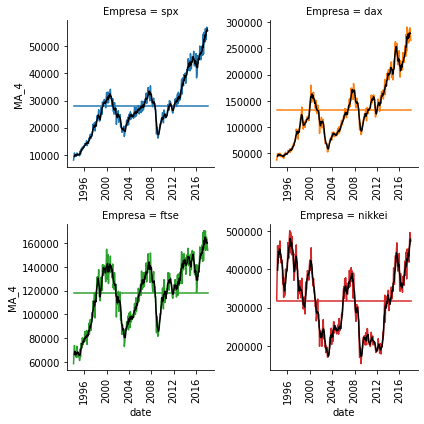

In [18]:
g = sns.FacetGrid(melt, col="Empresa"
                     ,col_wrap = 2
                      ,sharey=False
                      ,sharex=False
                  ,hue = 'Empresa' )
g.map(sns.lineplot, 'date', "monto")   # original
g.map(sns.lineplot, "date", "media")    # media simple
g.map(sns.lineplot, "date", "MA_4",color ='k')  # MA (w = 4)

# esta parte hace la rotación por cada plot

for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

In [19]:
import plotnine
from plotnine import ggplot, aes
from plotnine.geoms import geom_smooth
from plotnine.themes.elements import element_text
from plotnine.themes import theme

/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 3 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)


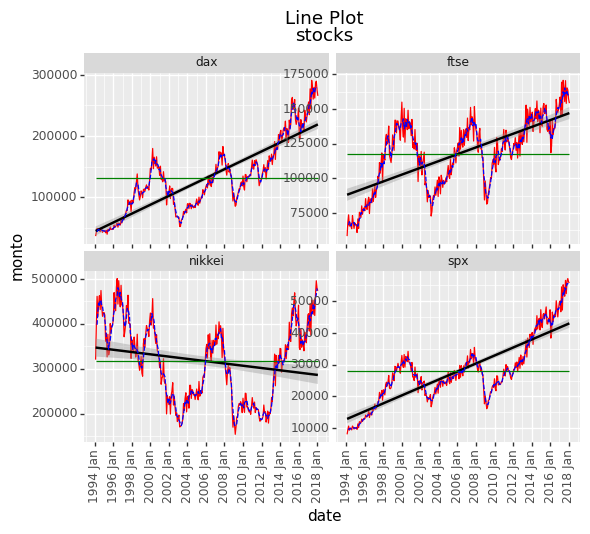

In [25]:
line_plot = ggplot(data=melt, mapping=aes(x='date', y='monto'))

# add layers
# draw() not needed
(line_plot + 
 plotnine.geom_line(color='red') + 
 plotnine.geom_smooth(method ='lm') + # tendencia
 plotnine.geom_line(aes(x='date',y='media'),color ='green') +  # media
 plotnine.geom_line(aes(x='date',y='MA_4'),color ='blue',linetype = "dashed") + # media movil
 plotnine.facet_wrap('Empresa',scales='free',ncol = 2) +    # independiza los plots , hace un plot por cada symbol
 #plotnine.geom_smooth(method = 'lm') +
 plotnine.theme(axis_text_x= element_text(angle=90)) +
 plotnine.scale_x_date(date_labels ='%Y %b',breaks ='2 years') +
 # labels
 
 plotnine.labs(title='Line Plot\nstocks') 

 # add annotation to plot
 #plotnine.annotate('text', x=pd.Timestamp('2005-08-01'), y=45000, label='texto', color='darkred')
 ).draw();